In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn import metrics
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [91]:
housePrice = pd.read_csv("data/train.csv")

# Analysis of Sales Price

In [92]:
housePrice['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

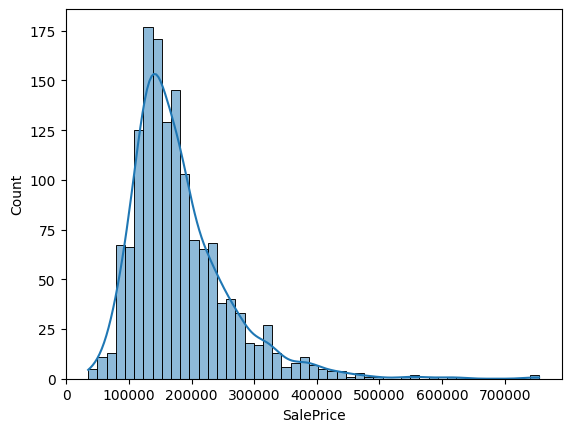

In [93]:
sns.histplot(housePrice['SalePrice'], kde=True)

# First-Look Analysis of the Data

In [94]:
housePrice.shape

(1460, 81)

In [95]:
housePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
housePrice.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [97]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Heat Map Analysis

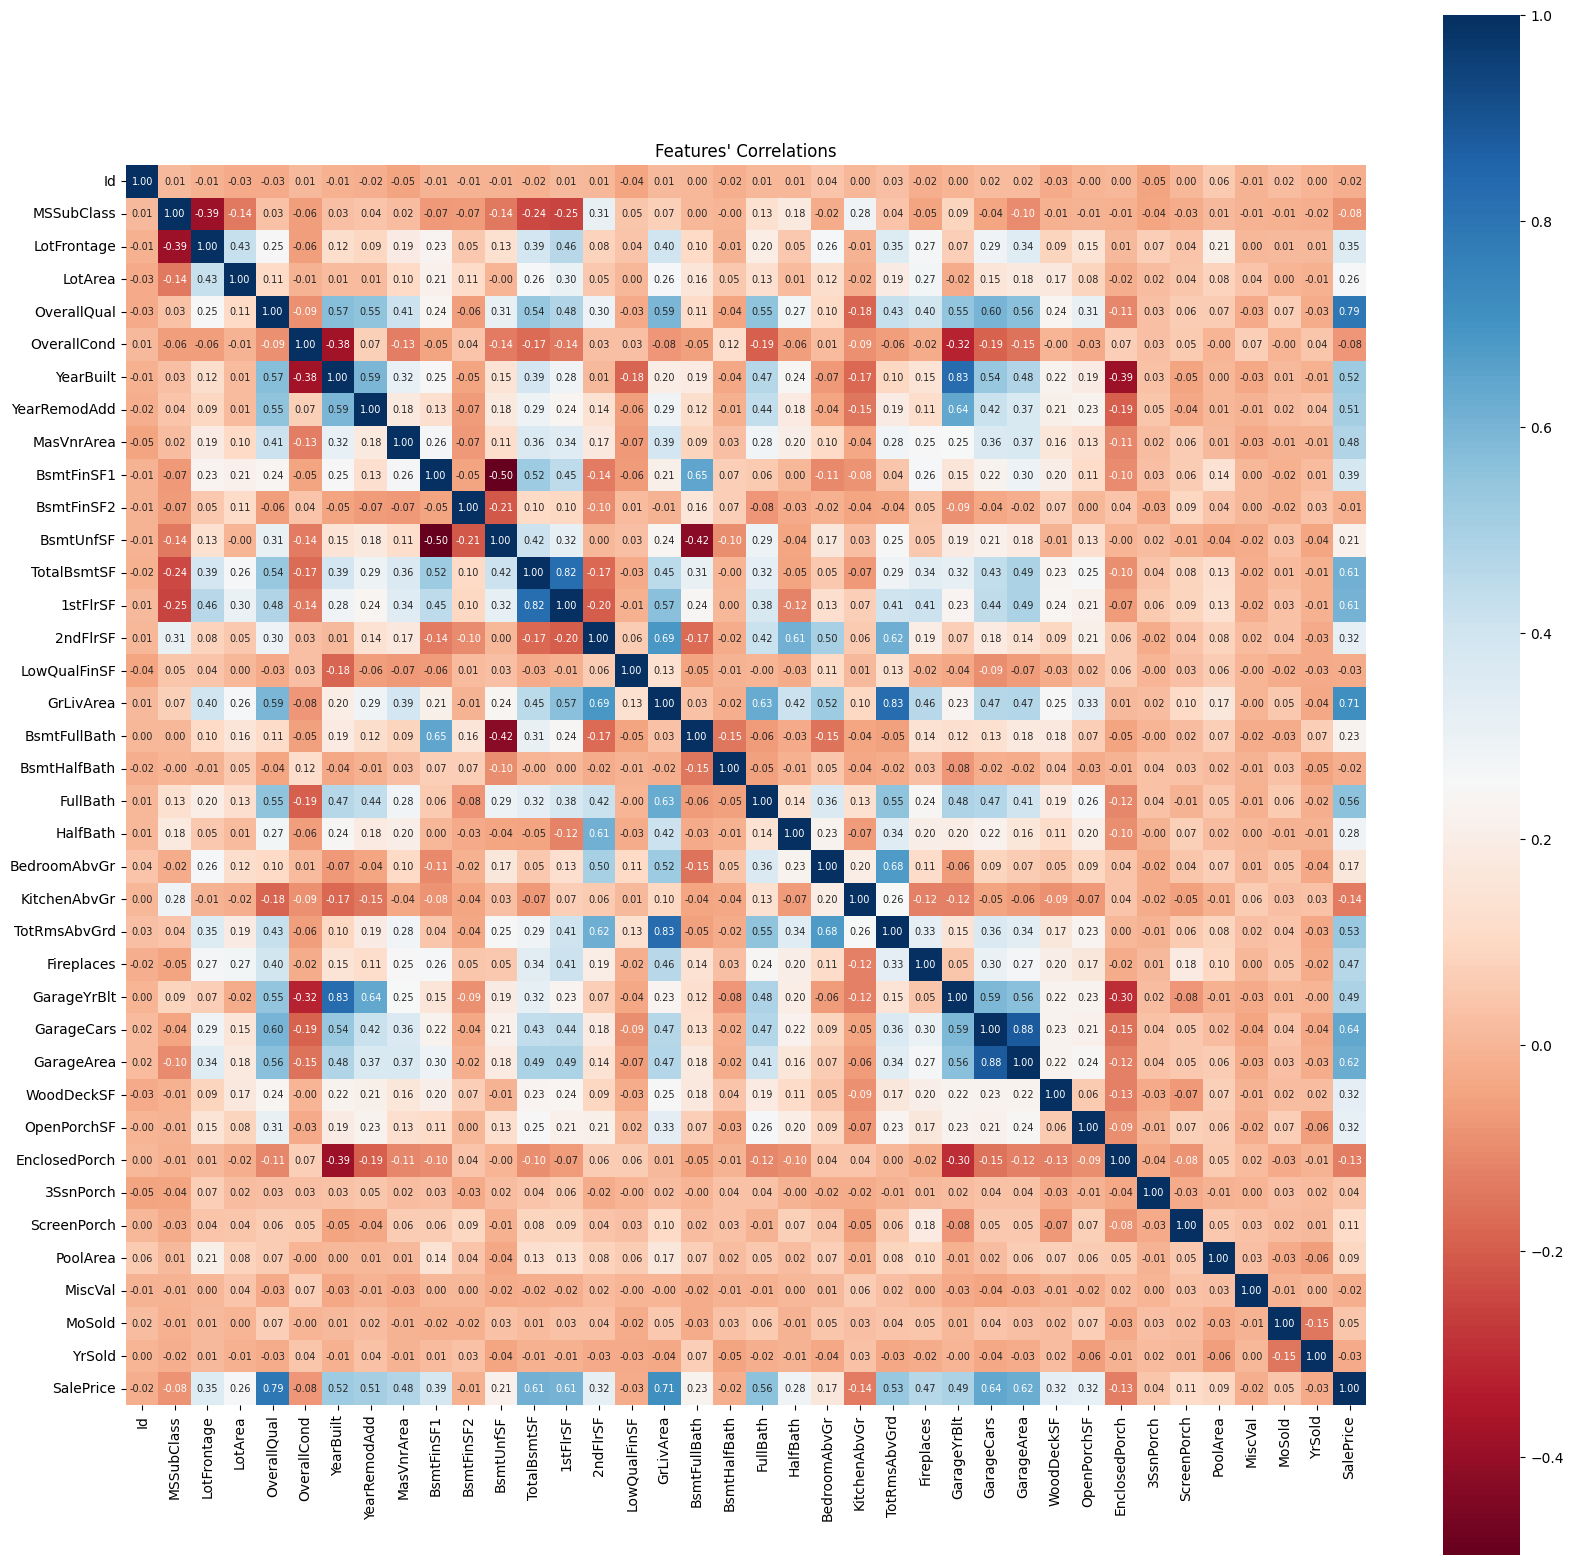

In [98]:
numeric_columns = housePrice.select_dtypes(include=np.number)
plt.figure(figsize=(20,20))
sns.heatmap(numeric_columns.corr(), cmap="RdBu", cbar=True, square=True, fmt=".2f", annot=True, annot_kws={'size': 7})
plt.title("Features' Correlations")
plt.show()

In [99]:
numeric_columns = housePrice.select_dtypes(include=np.number)
corr_matrix = numeric_columns.corr()
target_corr = corr_matrix["SalePrice"]
filtered_corr = target_corr[abs(target_corr) >= 0.48]

strong_corr_features = pd.DataFrame(filtered_corr).drop("SalePrice")
strong_corr_features.columns = ["Correlation with SalePrice"]
strong_corr_features = strong_corr_features.sort_values(by="Correlation with SalePrice", ascending=False)
print(strong_corr_features)

              Correlation with SalePrice
OverallQual                     0.790982
GrLivArea                       0.708624
GarageCars                      0.640409
GarageArea                      0.623431
TotalBsmtSF                     0.613581
1stFlrSF                        0.605852
FullBath                        0.560664
TotRmsAbvGrd                    0.533723
YearBuilt                       0.522897
YearRemodAdd                    0.507101
GarageYrBlt                     0.486362


# Handling Missing Data:

In [100]:
total = housePrice.isnull().sum().sort_values(ascending=False)
percent = (housePrice.isnull().sum()/housePrice.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


# Assessment of Other Features

In [101]:
heatMapRemovals = ["GarageArea", "1stFlrSF", "TotRmsAbvGrd"]

In [102]:
housePrice_scrubbed = housePrice.drop(missing_data[missing_data['Total'] > 1].index, axis=1)
housePrice_scrubbed = housePrice_scrubbed.drop(housePrice[housePrice['Electrical'].isnull()].index)
housePrice_scrubbed.isnull().sum().max() # just checking that there's no missing data missing...

0

In [103]:
housePrice_scrubbed.shape

(1459, 63)

In [104]:
# Below is the removal of features based on our Heat Map Analysis:
housePrice_scrubbed.drop(columns=heatMapRemovals, inplace=True)

In [105]:
#Would expect 60 rows remaining (63 - 3)
housePrice_scrubbed.shape

(1459, 60)

In [106]:
pd.set_option('display.max_rows', None)
columns_table = pd.DataFrame(housePrice_scrubbed.columns, columns=['Remaining Columns'])
print(columns_table)

   Remaining Columns
0                 Id
1         MSSubClass
2           MSZoning
3            LotArea
4             Street
5           LotShape
6        LandContour
7          Utilities
8          LotConfig
9          LandSlope
10      Neighborhood
11        Condition1
12        Condition2
13          BldgType
14        HouseStyle
15       OverallQual
16       OverallCond
17         YearBuilt
18      YearRemodAdd
19         RoofStyle
20          RoofMatl
21       Exterior1st
22       Exterior2nd
23         ExterQual
24         ExterCond
25        Foundation
26        BsmtFinSF1
27        BsmtFinSF2
28         BsmtUnfSF
29       TotalBsmtSF
30           Heating
31         HeatingQC
32        CentralAir
33        Electrical
34          2ndFlrSF
35      LowQualFinSF
36         GrLivArea
37      BsmtFullBath
38      BsmtHalfBath
39          FullBath
40          HalfBath
41      BedroomAbvGr
42      KitchenAbvGr
43       KitchenQual
44        Functional
45        Fireplaces
46        Gar

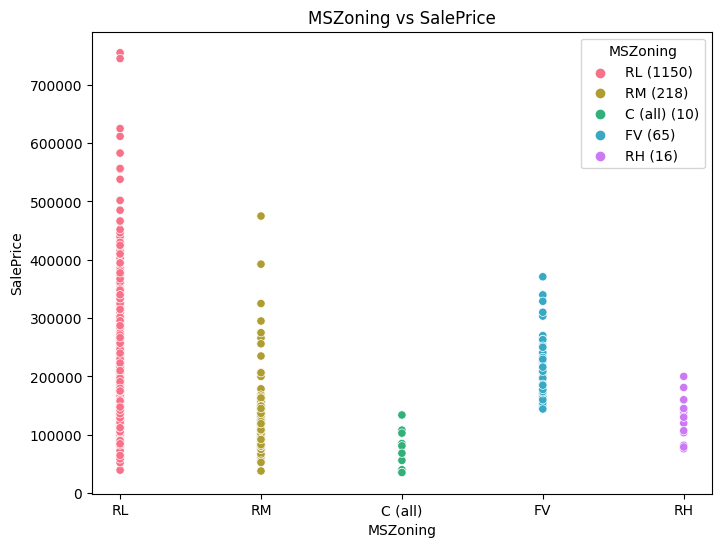

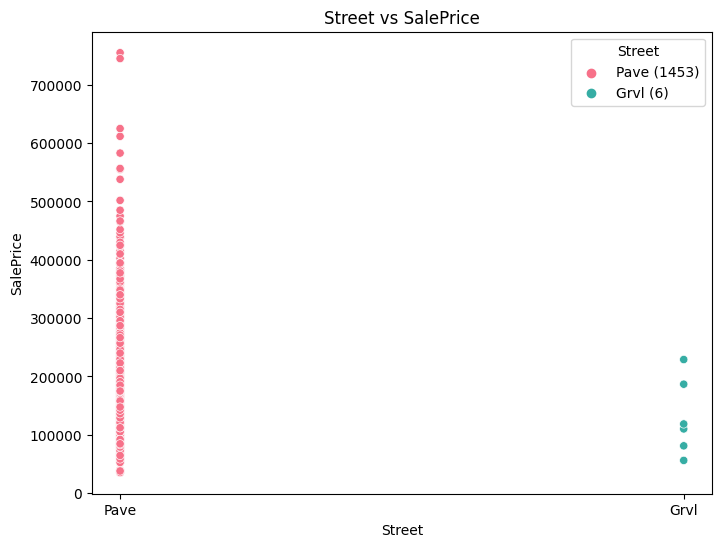

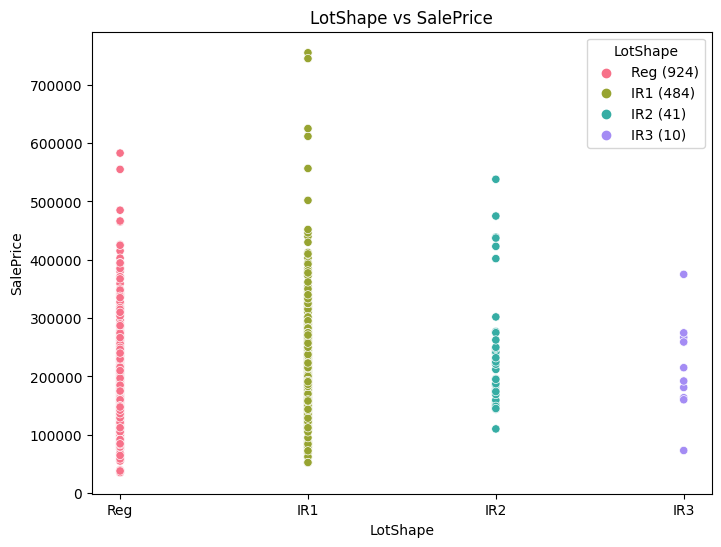

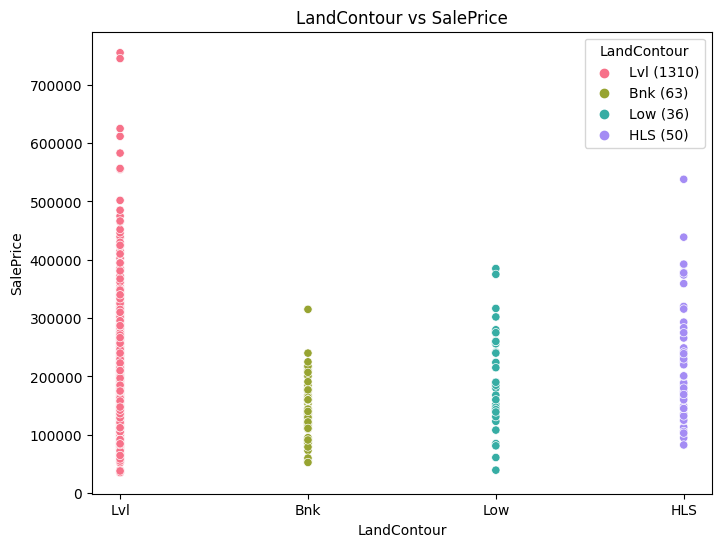

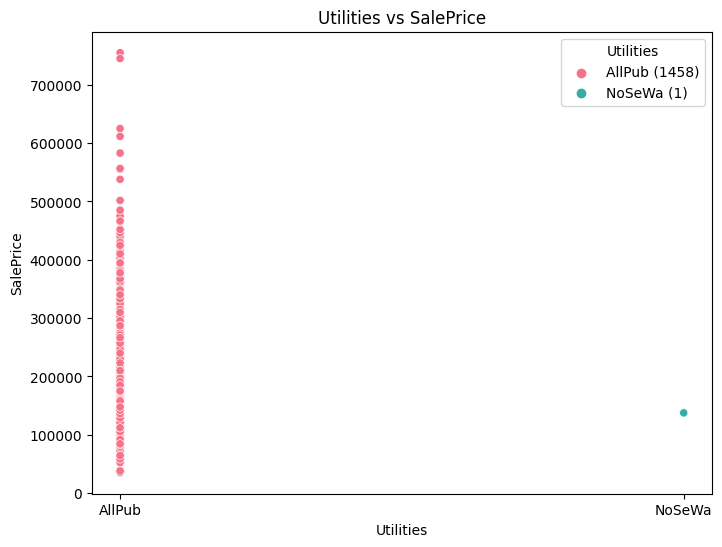

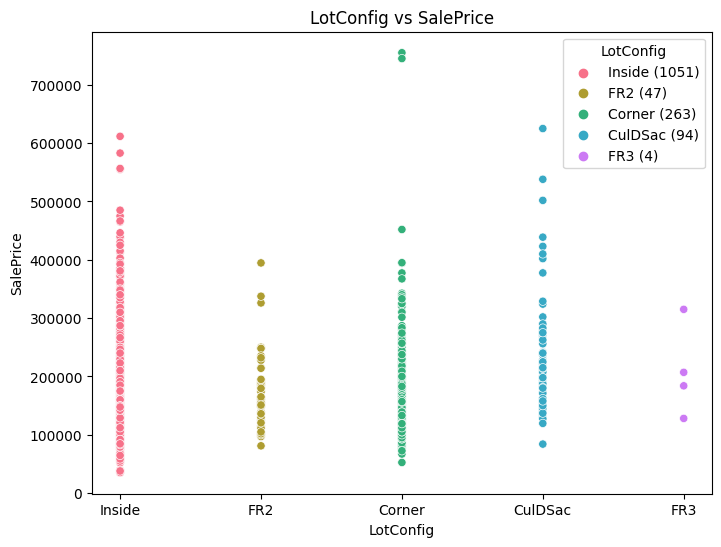

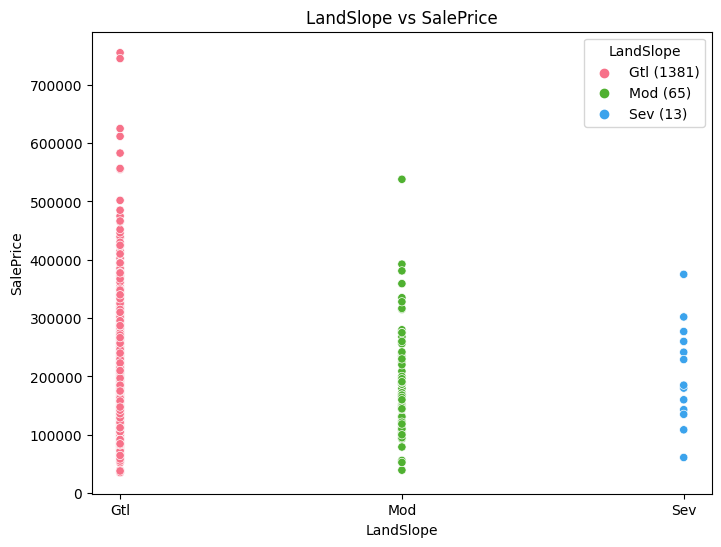

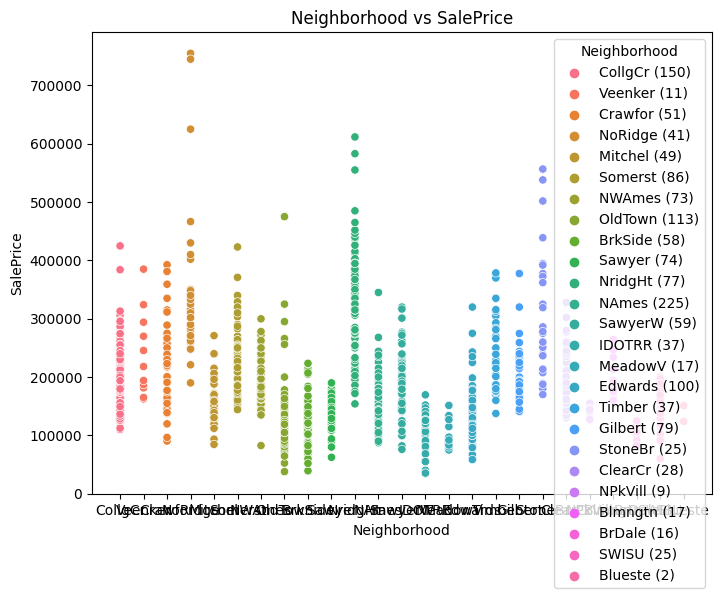

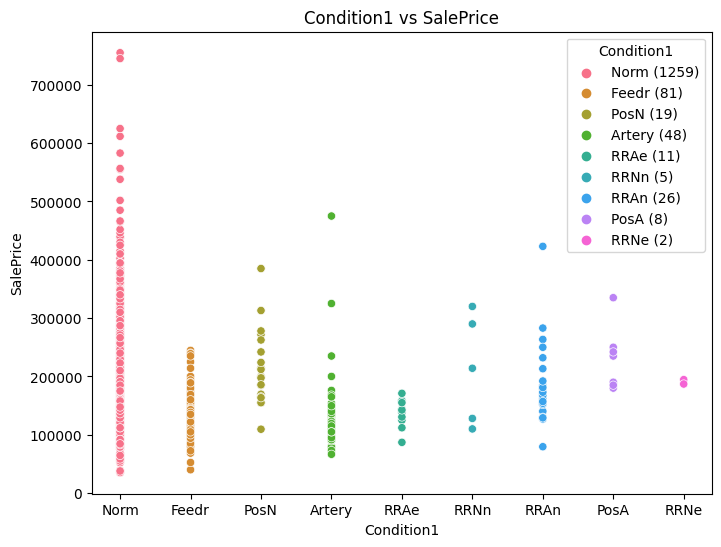

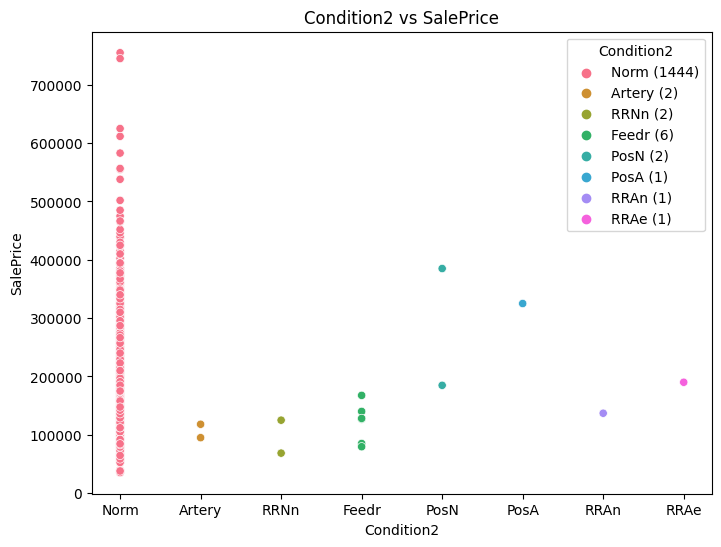

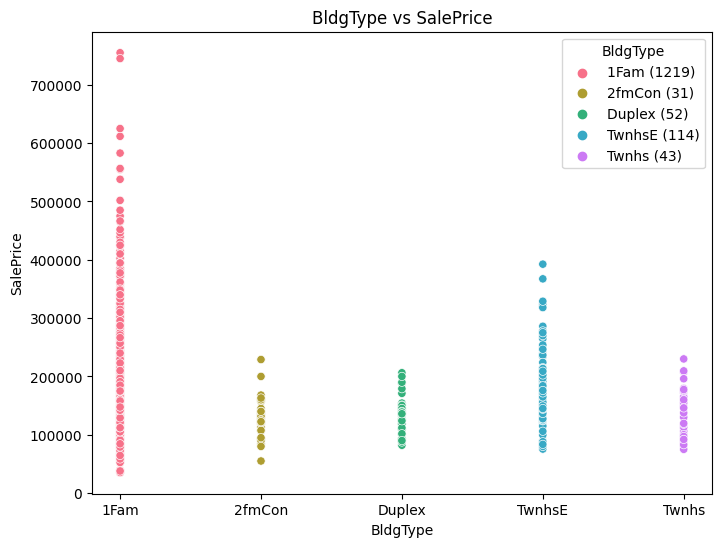

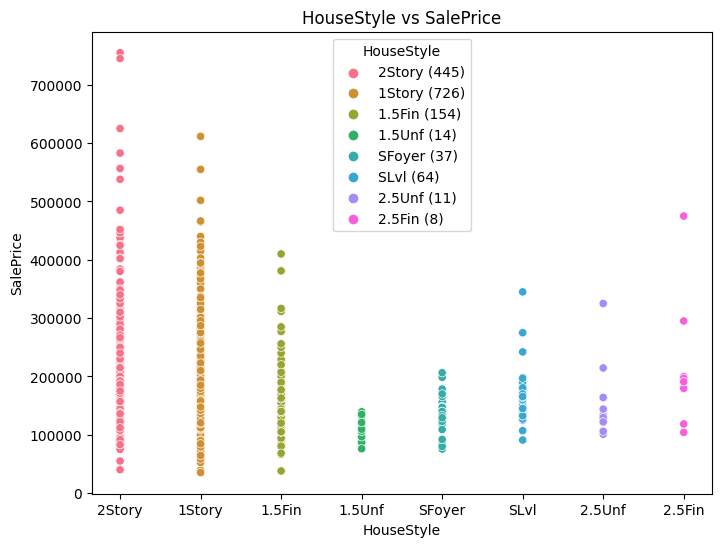

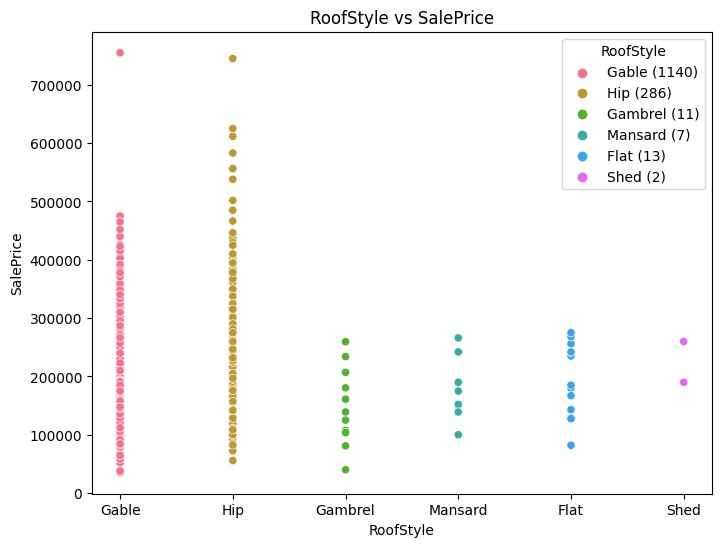

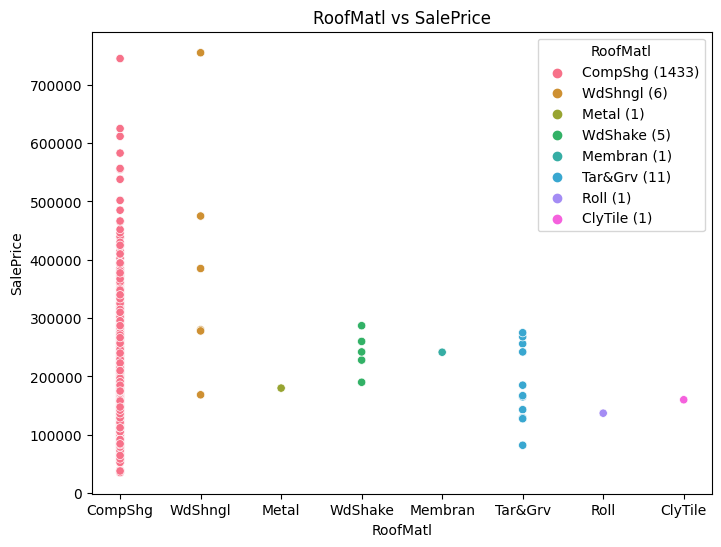

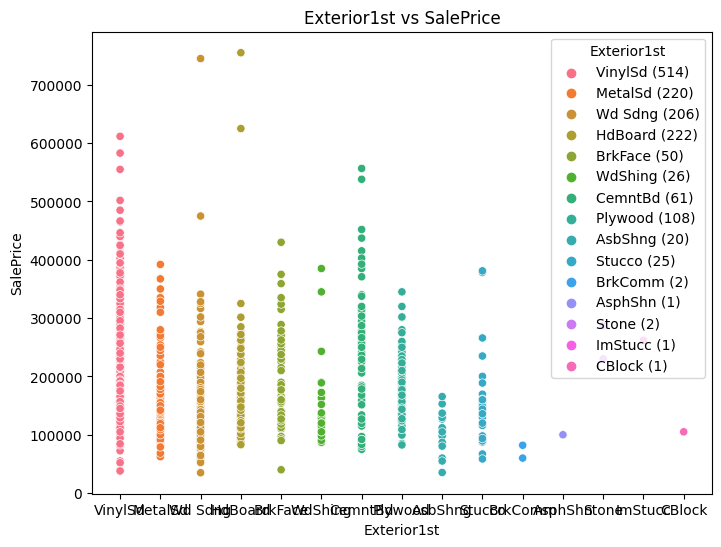

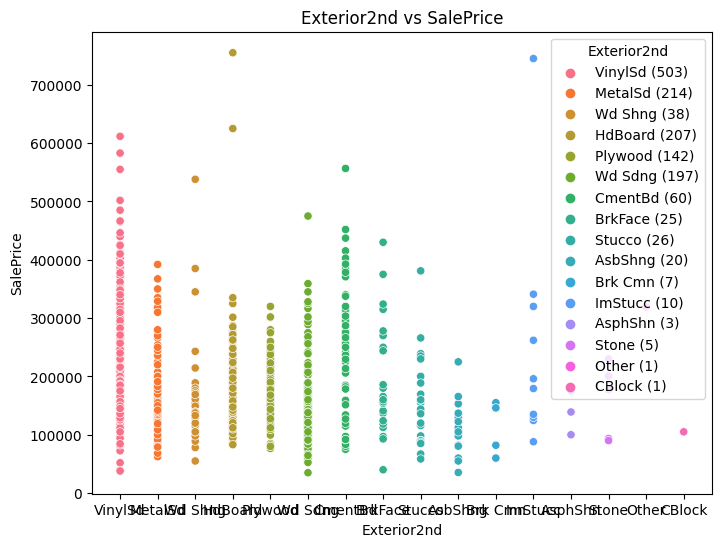

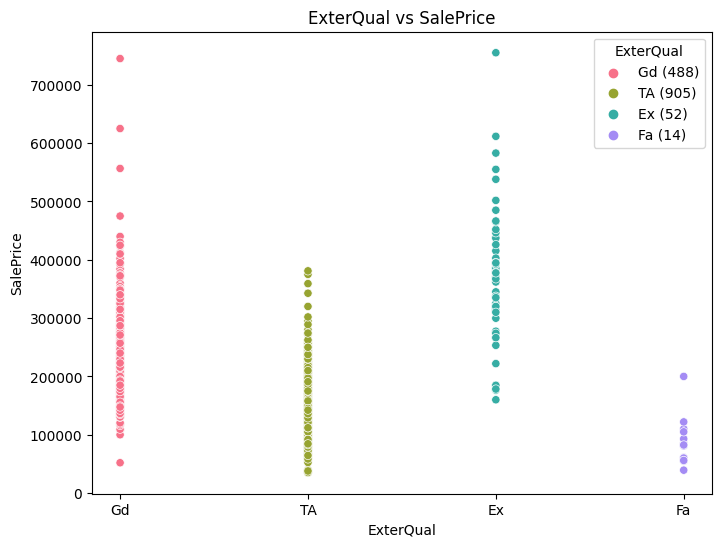

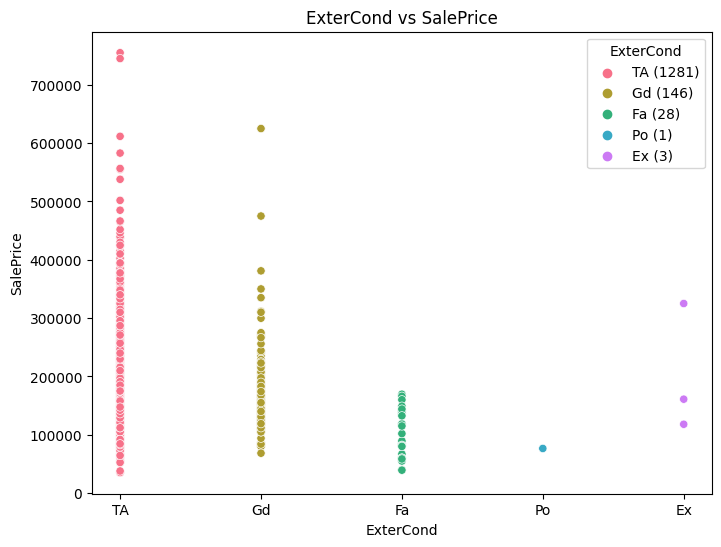

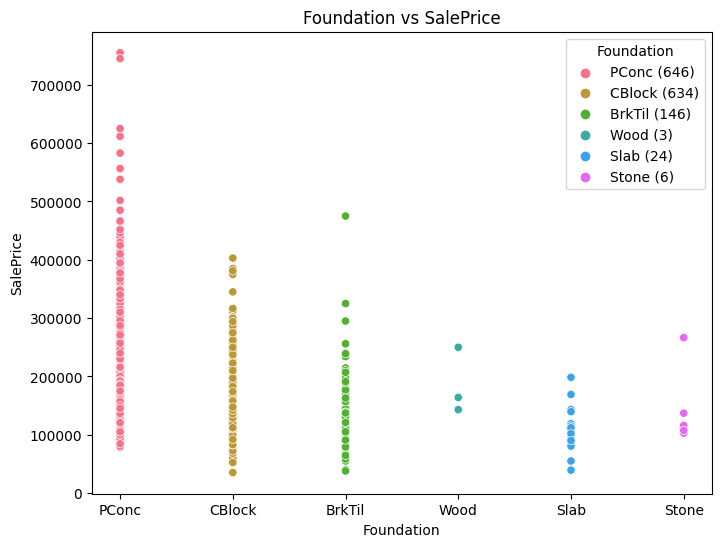

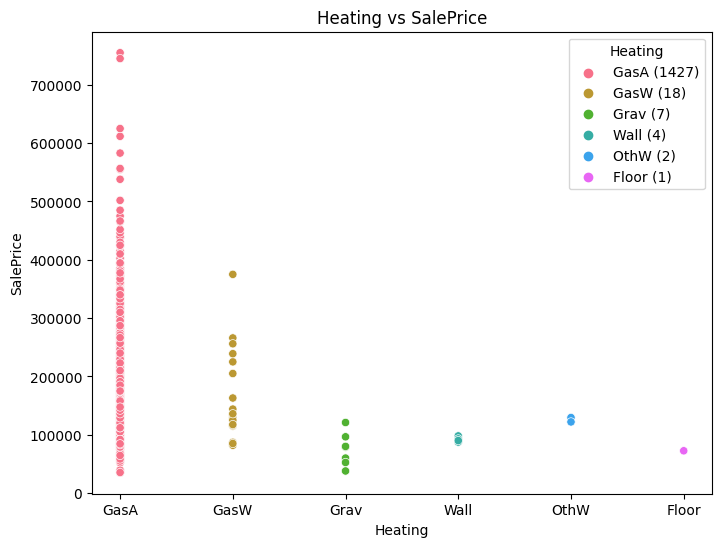

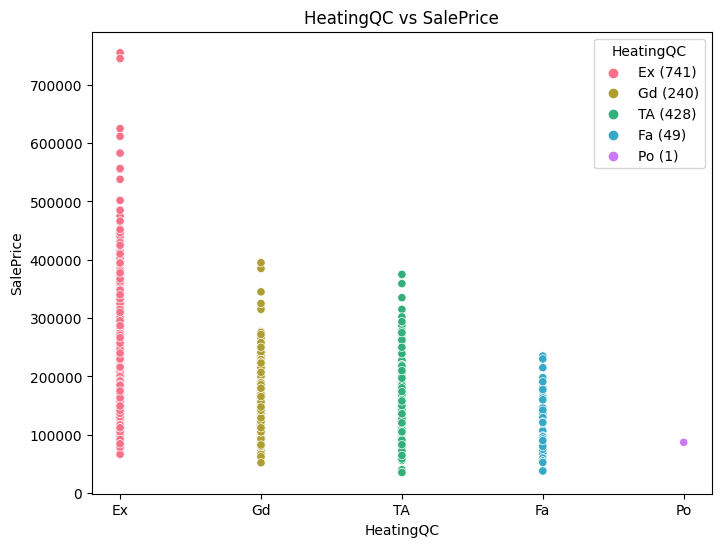

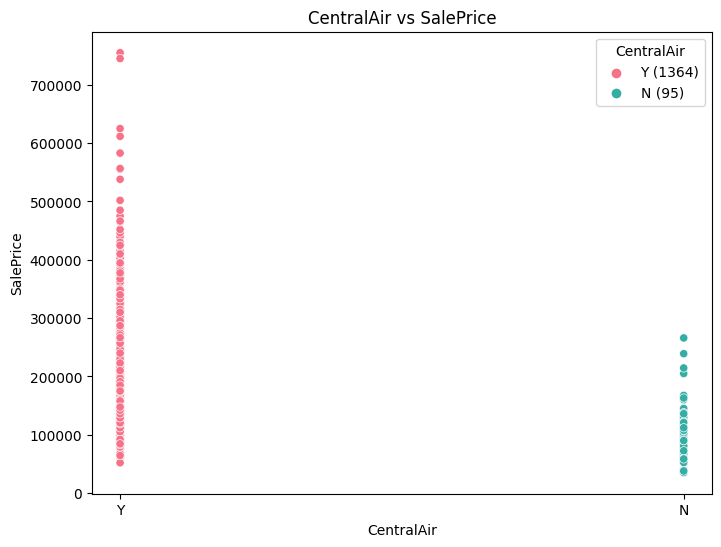

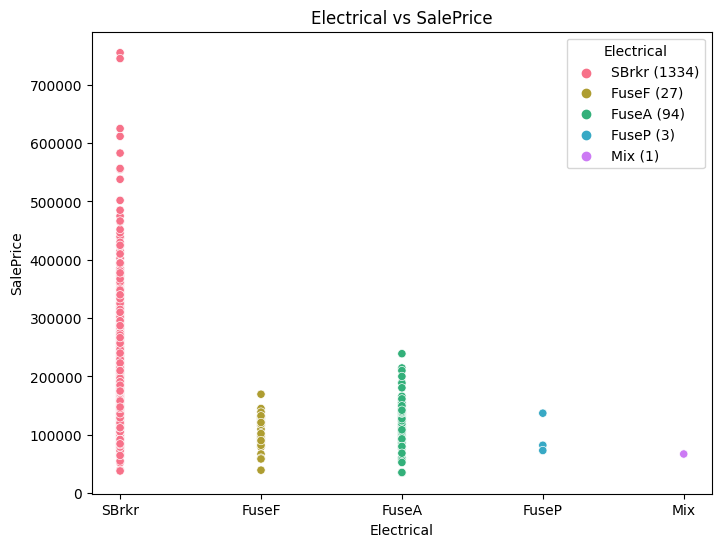

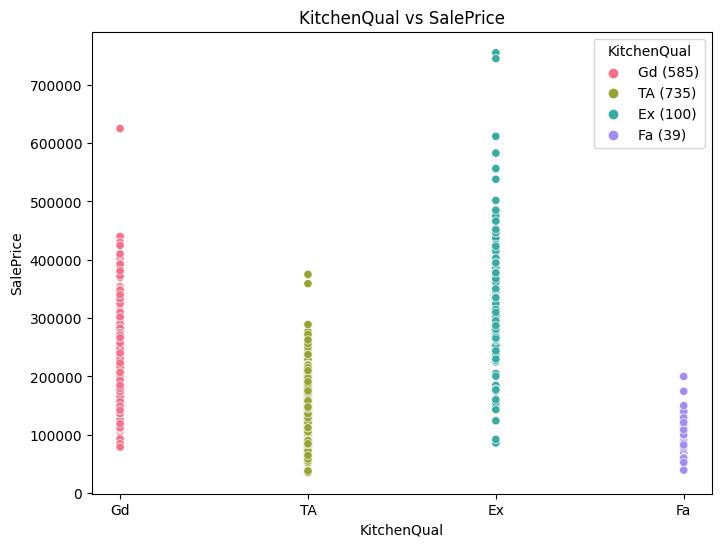

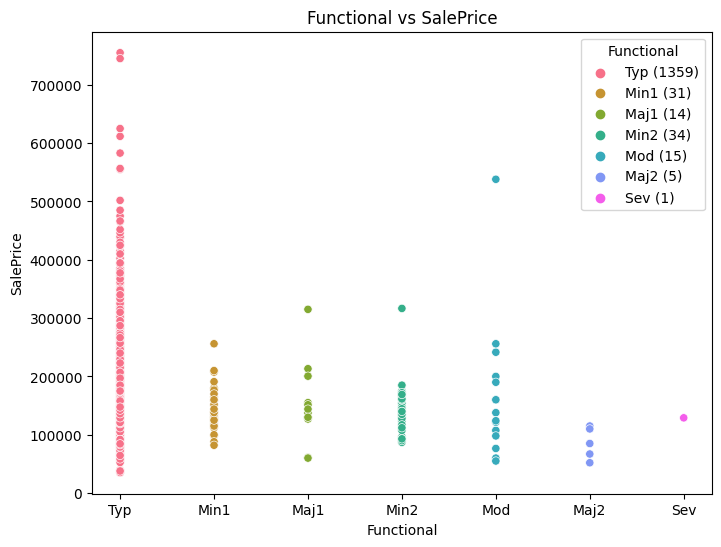

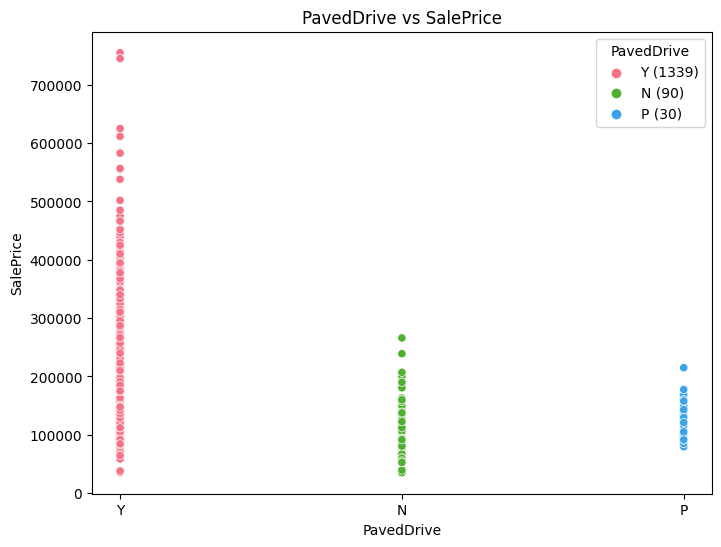

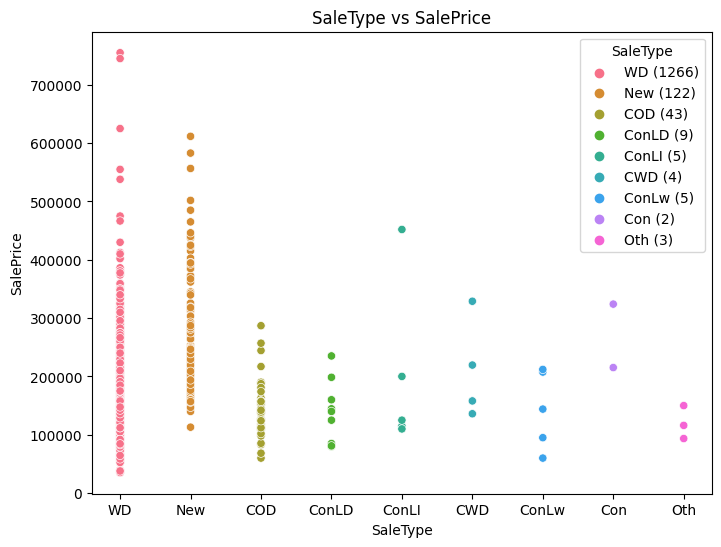

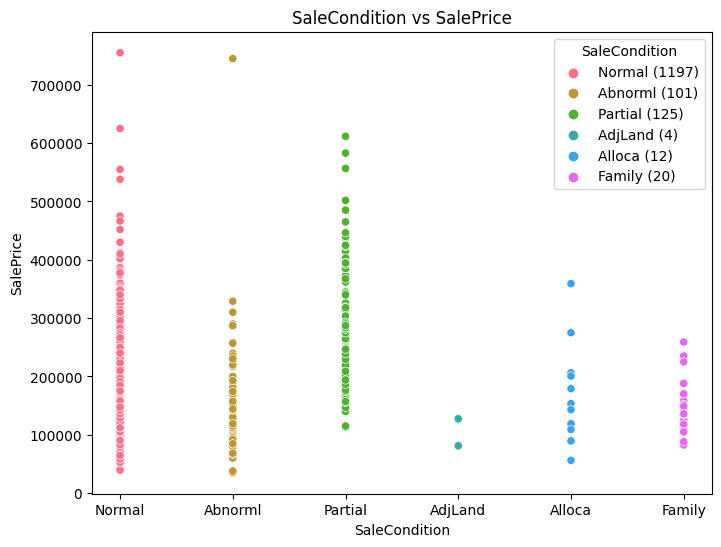

In [107]:
# Next, we will do an assessment over the qualitative features:
# Select non-numerical features
non_numeric_features = housePrice_scrubbed.select_dtypes(exclude='number').columns

# Create scatterplots for each non-numerical feature
for feature in non_numeric_features:
    plt.figure(figsize=(8, 6))
    counts = housePrice_scrubbed[feature].value_counts()
    unique_values = housePrice_scrubbed[feature].unique()
    counts_mapping = {value: counts[value] for value in unique_values}
    legend_labels = [f"{value} ({counts_mapping[value]})" for value in unique_values]
    color_palette = sns.color_palette("husl", len(unique_values))  # Set the color palette

    scatterplot = sns.scatterplot(data=housePrice_scrubbed, x=feature, y="SalePrice", hue=feature, palette=dict(zip(unique_values, color_palette)), legend=True)
    legend = scatterplot.get_legend()
    for text, label in zip(legend.texts, legend_labels):
        text.set_text(label)

    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

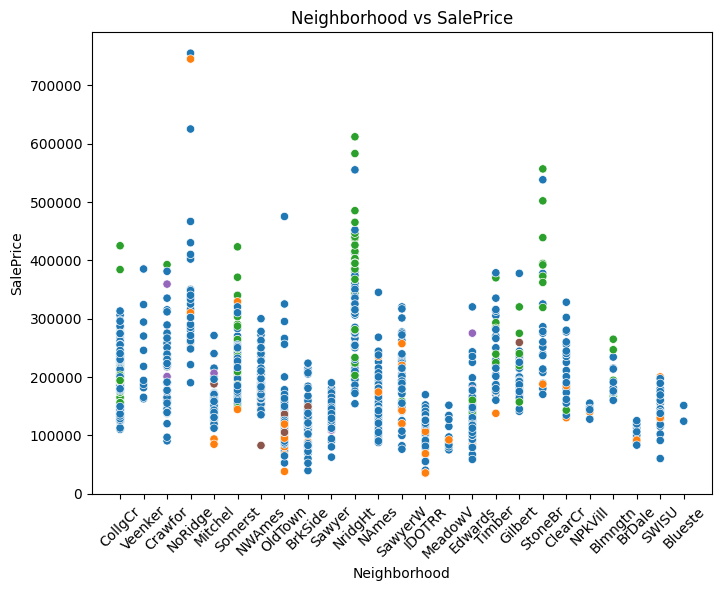

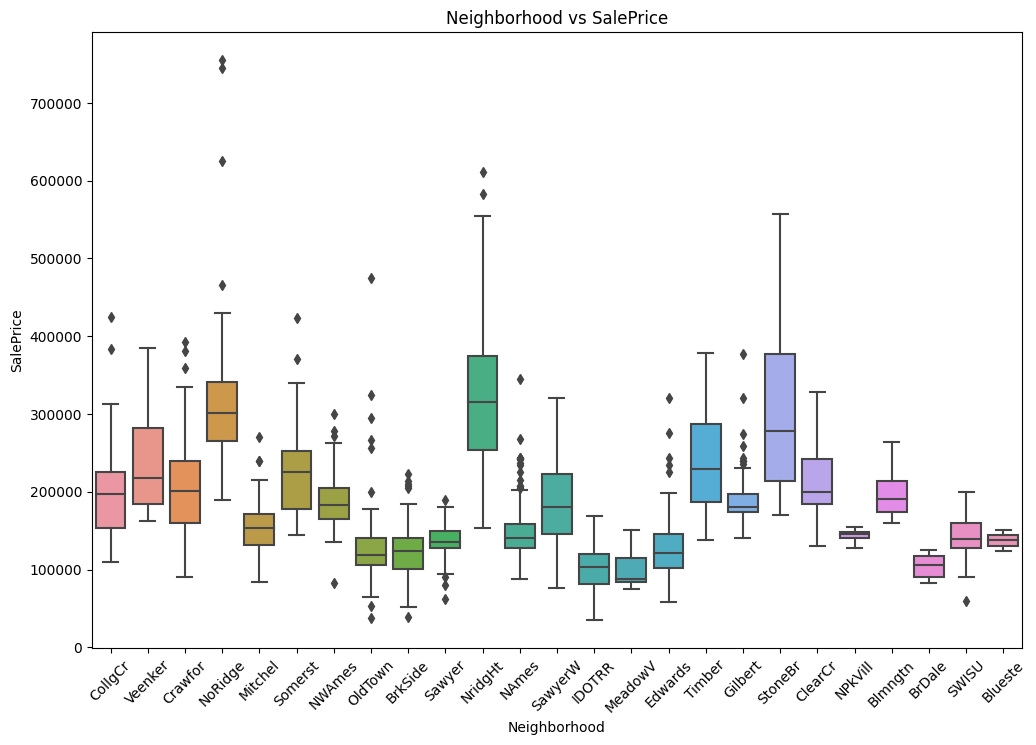

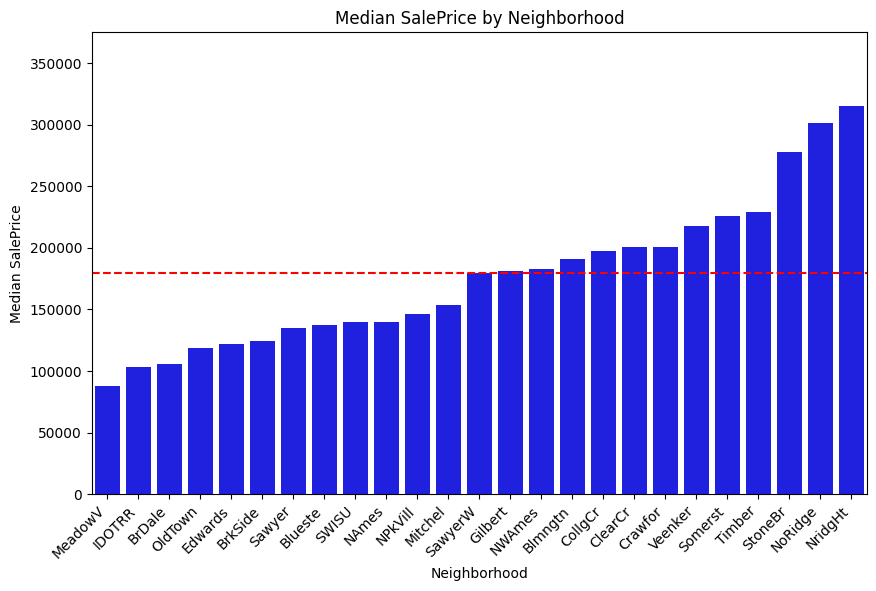

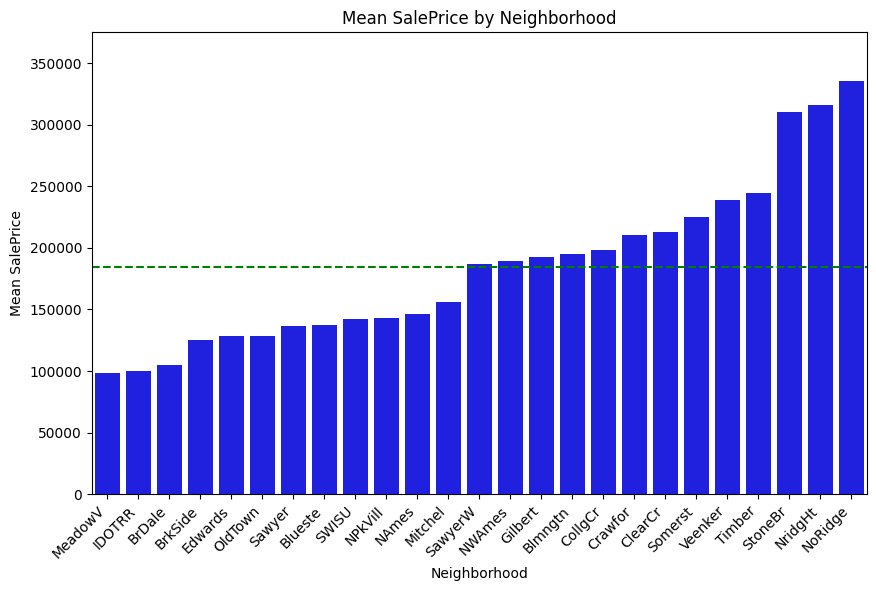

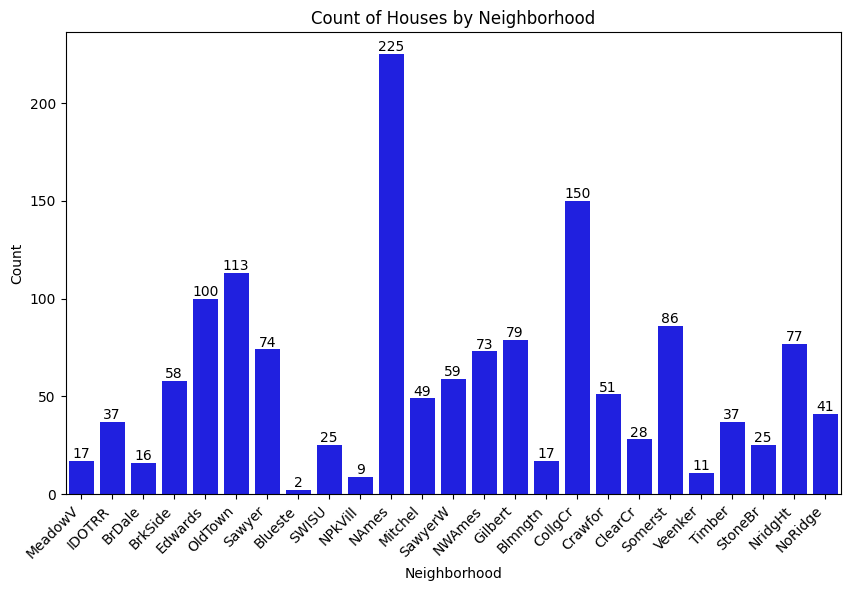

In [108]:
# "NEIGHBORHOOD" FEATURE IN-DEPTH ANALYSIS:
# Neighboorhood scatterplot are covered by the legend. I re-did the scatterplot below without the legend:

# SCATTERPLOT:
plt.figure(figsize=(8, 6))
legend_hidden_scatterplot = sns.scatterplot(data=housePrice_scrubbed, x="Neighborhood", y="SalePrice", hue=feature, legend=False)

plt.title(f'Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.ylabel('SalePrice')
plt.show()

# It was still difficult for me to understand the impactfulness of the feature on sale price so I went in depth for additional charts to visuallize the data:
# BOXPLOT:
plt.figure(figsize=(12, 8))
sns.boxplot(data=housePrice_scrubbed, x="Neighborhood", y="SalePrice")
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# BAR CHARTS:
# Create the bar plot with median and mean sale prices
median_prices = housePrice_scrubbed.groupby('Neighborhood')['SalePrice'].median().sort_values()
mean_prices = housePrice_scrubbed.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# MEDIAN SALE PRICES
plt.figure(figsize=(10, 6))
sns.barplot(data=housePrice_scrubbed, x='Neighborhood', y='SalePrice', 
            estimator='median', order=median_prices.index, color='blue', errorbar=None)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 375000)
plt.xlabel('Neighborhood')
plt.ylabel('Median SalePrice')
plt.title('Median SalePrice by Neighborhood')

plt.axhline(y=median_prices.median(), linestyle='dashed', color='red', label='Median SalePrice')
plt.show()

# MEAN SALE PRICES
plt.figure(figsize=(10, 6))
sns.barplot(data=housePrice_scrubbed, x='Neighborhood', y='SalePrice', 
            estimator='mean', order=mean_prices.index, color='blue', errorbar=None)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 375000)
plt.xlabel('Neighborhood')
plt.ylabel('Mean SalePrice')
plt.title('Mean SalePrice by Neighborhood')

plt.axhline(y=mean_prices.mean(), linestyle='dashed', color='green', label='Mean SalePrice')
plt.show()

# Count of each category
count_data = housePrice_scrubbed['Neighborhood'].value_counts().sort_values(ascending=False)

# Create the bar plot with count of each category (ORDERED BY THE SAME ORDER OF MEAN SALE PRICES ABOVE)
plt.figure(figsize=(10, 6))
sns.countplot(data=housePrice_scrubbed, x='Neighborhood', order=mean_prices.index, color='blue')

# Add count values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Count of Houses by Neighborhood')

plt.show()

In [109]:
poorest = ['MeadowV', 'IDOTRR', 'BrDale']
below_mean = ['BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel']
closeto_mean_median = ['SawyerW', 'NWAmes', 'Gilbert']
above_mean = ['Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber']
richest = ['StoneBr', 'NridgHt', 'NoRidge']

housePrice_scrubbed['Neighborhood_Encoded'] = np.select(
    [
        housePrice_scrubbed['Neighborhood'].isin(poorest),
        housePrice_scrubbed['Neighborhood'].isin(below_mean),
        housePrice_scrubbed['Neighborhood'].isin(closeto_mean_median),
        housePrice_scrubbed['Neighborhood'].isin(above_mean),
        housePrice_scrubbed['Neighborhood'].isin(richest)
    ],
    [0, 1, 2, 3, 4],
    default=0
)

# Create a separate dataframe with the encoded "Neighborhood" feature and the sale price
encoded_neighborhood_df = housePrice_scrubbed[['Neighborhood_Encoded', 'SalePrice']].copy()

count_table = encoded_neighborhood_df.groupby('Neighborhood_Encoded').size().reset_index(name='Count')
print(count_table)

correlation = encoded_neighborhood_df['Neighborhood_Encoded'].corr(encoded_neighborhood_df['SalePrice'])
print("Correlation between Neighborhood_Encoded and SalePrice:", correlation)

   Neighborhood_Encoded  Count
0                     0     70
1                     1    655
2                     2    211
3                     3    380
4                     4    143
Correlation between Neighborhood_Encoded and SalePrice: 0.6957897072154468


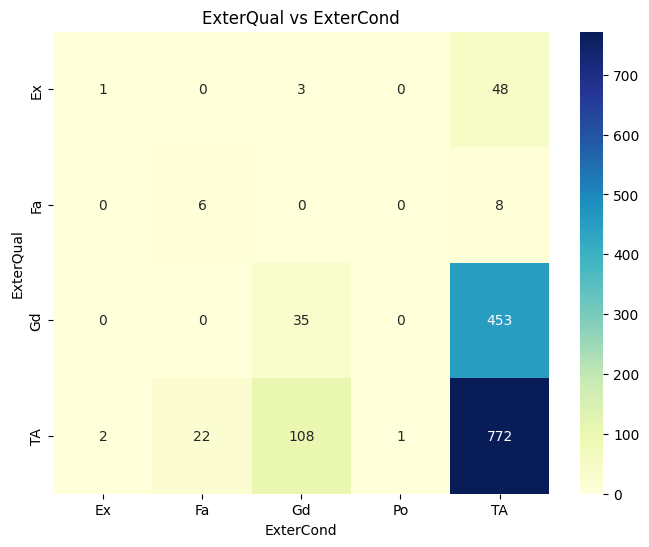

In [110]:
# "EXTERQUAL" AND "EXTERCOND" FEATURES IN-DEPTH ANALYSIS:
# I wanted to understand how the 2 features "ExterQual" and "ExterCond" related to each other since the data points for these 2 features were not in line with each other.
cross_tab = pd.crosstab(housePrice_scrubbed['ExterQual'], housePrice_scrubbed['ExterCond'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('ExterQual vs ExterCond')
plt.xlabel('ExterCond')
plt.ylabel('ExterQual')
plt.show()

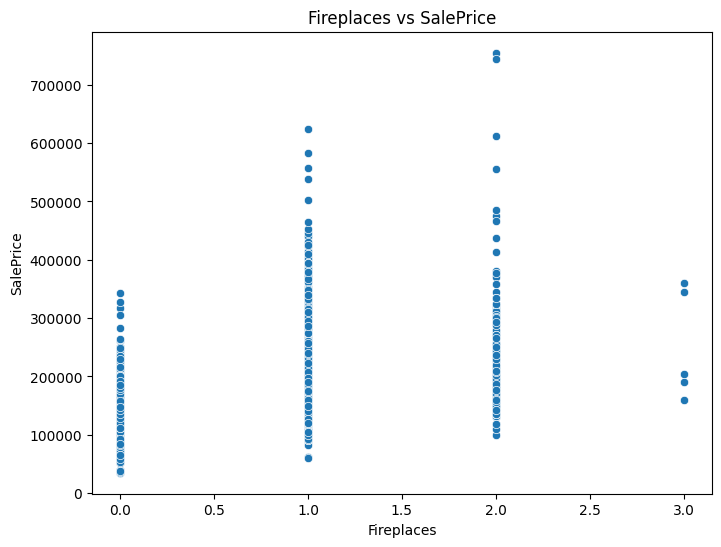

Fireplaces
0    689
1    650
2    115
3      5
Name: count, dtype: int64


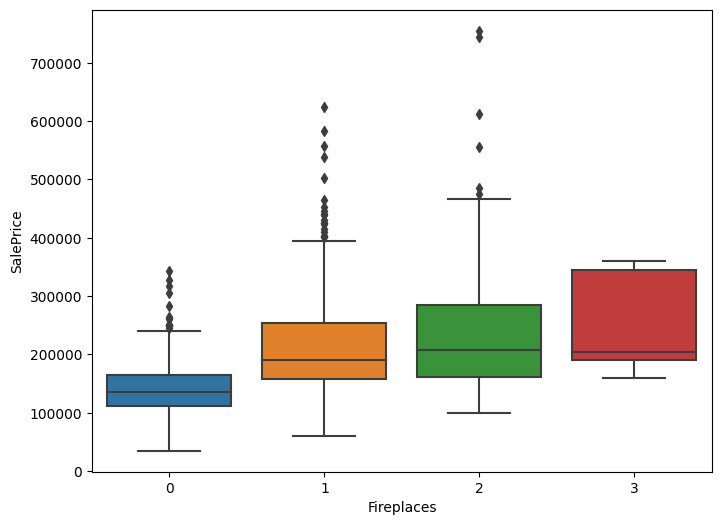

In [111]:
# "FIREPLACES" FEATURE IN-DEPTH ANALYSIS:
# Fireplace has a heat map correlation with SalePrice of 0.47. While I would normally consider this to be a moderate positive correlation under the Pearson Correlation, this is close enough to a strong correlation of 0.50. To complete our analysis on this feature, I will prepare a scatter plot for this categorical feature below:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=housePrice_scrubbed, x=housePrice_scrubbed['Fireplaces'], y=housePrice_scrubbed['SalePrice'])
plt.title('Fireplaces vs SalePrice')
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.show()

fireplace_data = pd.concat([housePrice_scrubbed['Fireplaces'], housePrice_scrubbed['SalePrice']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=housePrice_scrubbed['Fireplaces'], y=housePrice_scrubbed['SalePrice'], data=housePrice_scrubbed)

fireplace_counts = housePrice_scrubbed['Fireplaces'].value_counts()
fireplace_counts.columns = ['Fireplaces', 'Count']
print(fireplace_counts)

In [112]:
updated_feature_removal = ["Id", "MSSubClass", "MSZoning", "LotArea", "Street", "LotShape", "LandContour", "Utilities", "LotCon111fig", "LandSlope", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond", "Foundation", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "Heating", "HeatingQC", "CentralAir", "Electrical", "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "Functional", "Fireplaces", "PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition"]
print(len(updated_feature_removal))

# All features AND target needed for our predictive model:
features_included = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageCars", "Neighborhood_Encoded", "SalePrice"]
print(len(features_included))

51
9


# Identifying Outliers

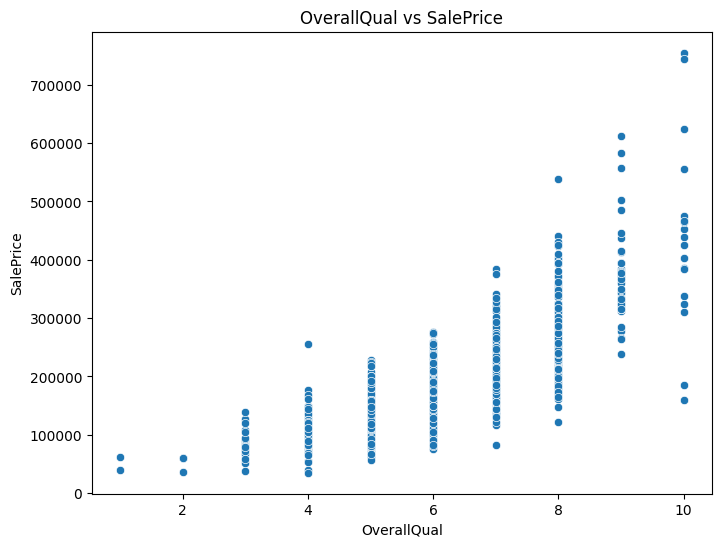

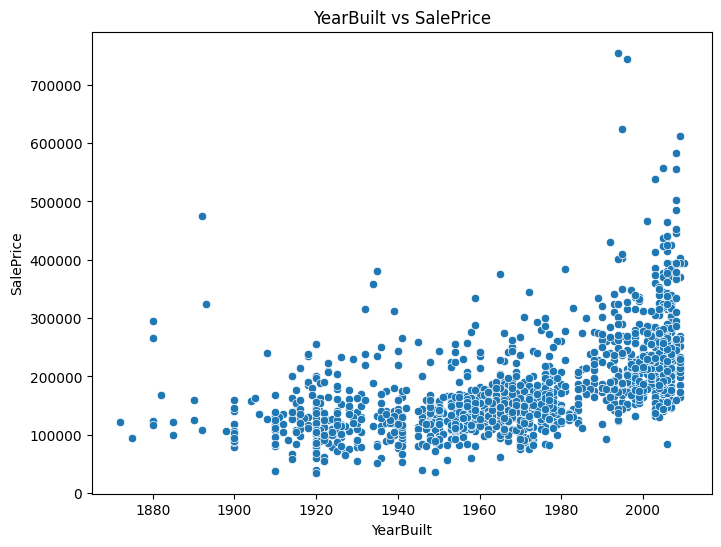

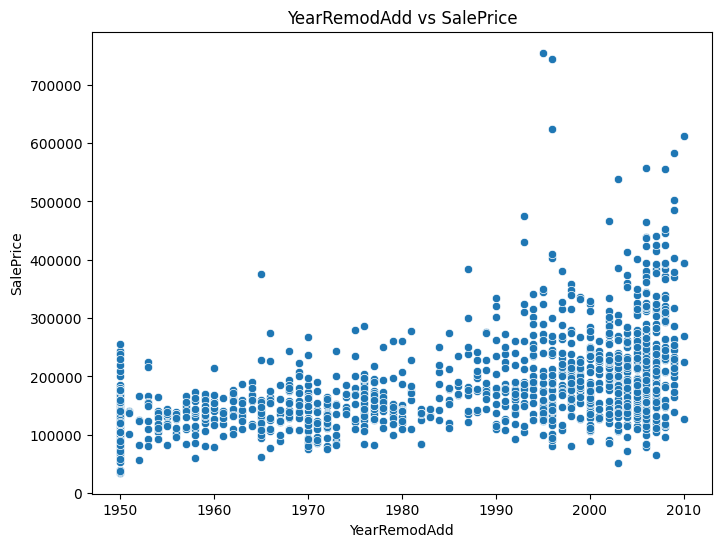

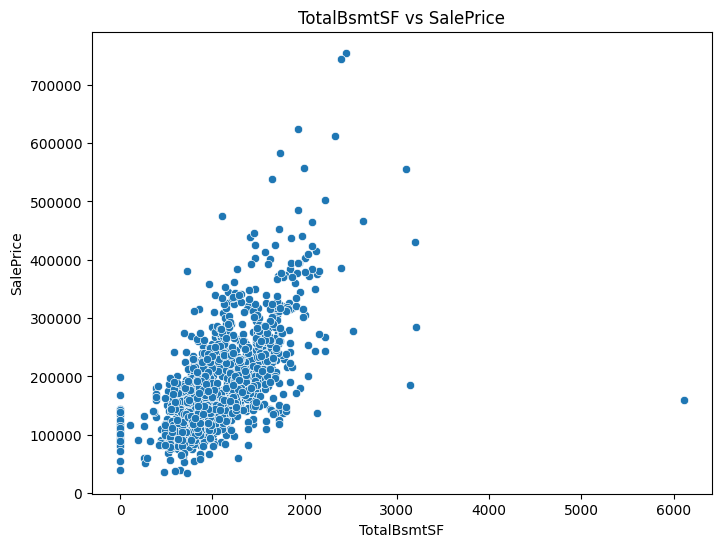

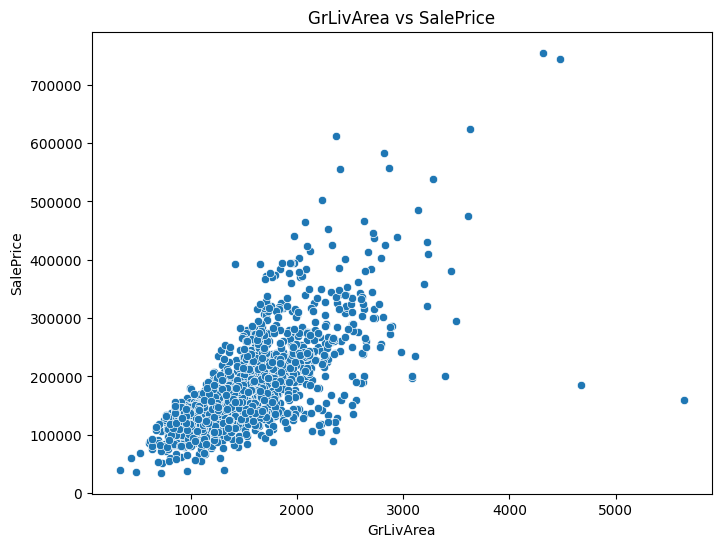

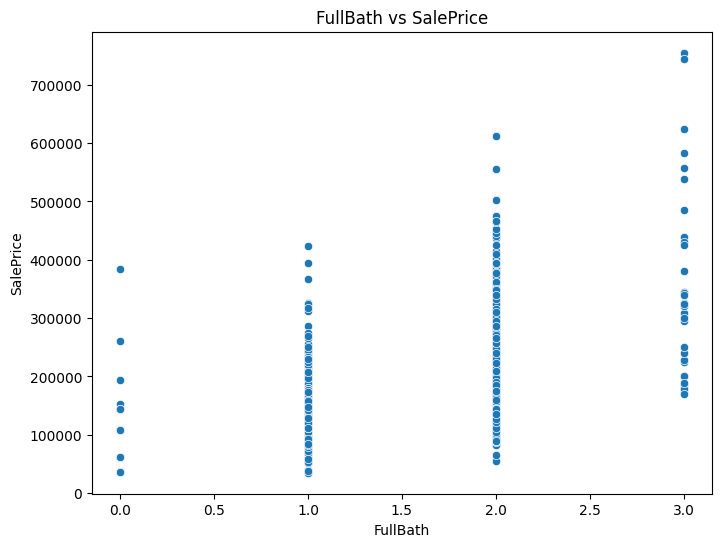

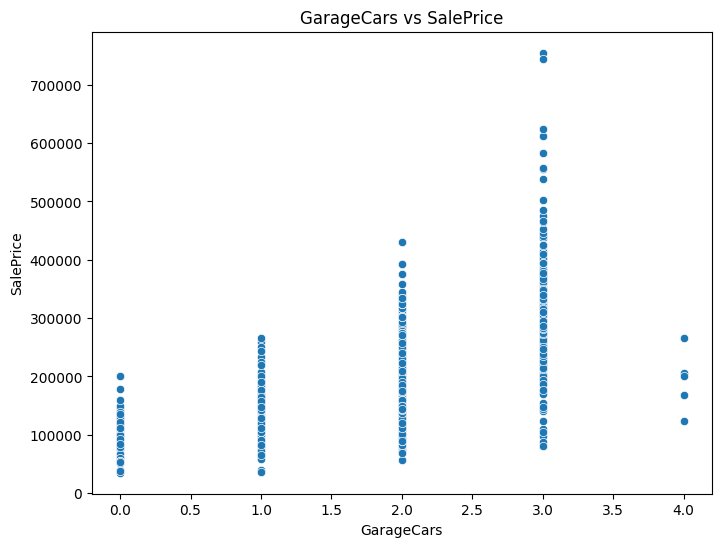

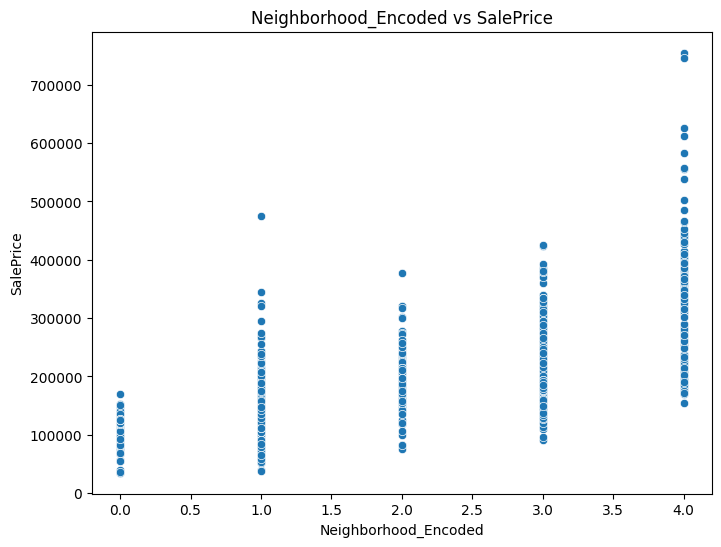

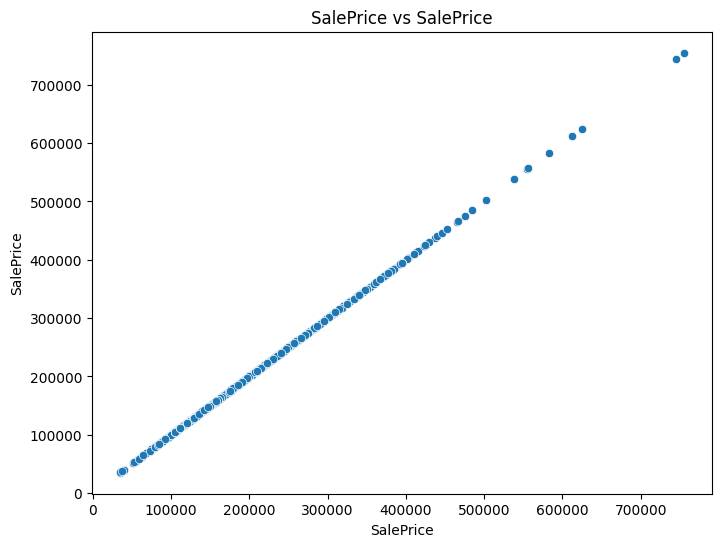

In [113]:
# We prepared scatterplots for each of the included features in our model to identify outliers.
for feature in features_included:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=housePrice_scrubbed, x=feature, y=housePrice_scrubbed['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [114]:
housePrice_scrubbed.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'Neighborhood_Encoded'],
      dtype='object')

In [115]:
ids_to_remove = [524, 1299]
housePrice_scrubbed = housePrice_scrubbed.drop(housePrice_scrubbed[housePrice_scrubbed['Id'].isin(ids_to_remove)].index)

In [116]:
housePrice_scrubbed.shape

(1457, 61)

# Handling the training and testing populations

In [117]:
features_included = ["Id", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageCars", "Neighborhood_Encoded", "SalePrice"]

training_population = housePrice_scrubbed.loc[:, features_included].copy()

print(training_population.shape)
print(training_population.head())

X = training_population.drop(["Id", "SalePrice"], axis=1)
Y = training_population["SalePrice"]

print(X.shape)
print(Y.shape)

(1457, 10)
   Id  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  FullBath   
0   1            7       2003          2003          856       1710         2  \
1   2            6       1976          1976         1262       1262         2   
2   3            7       2001          2002          920       1786         2   
3   4            7       1915          1970          756       1717         1   
4   5            8       2000          2000         1145       2198         2   

   GarageCars  Neighborhood_Encoded  SalePrice  
0           2                     3     208500  
1           2                     3     181500  
2           2                     3     223500  
3           3                     3     140000  
4           3                     4     250000  
(1457, 8)
(1457,)


In [118]:
# TESTING DATA:
testPrice = pd.read_csv("data/test.csv")
print(testPrice.shape)

# Check to ensure none of our relevant columns have missing or null values:
features_to_check = ["Id", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageCars", "Neighborhood"]
missing_values = testPrice[features_to_check].isnull().sum()

if missing_values.any():
    print("The following features have missing or null values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing or null values found in the specified features.")

(1459, 80)
The following features have missing or null values:
TotalBsmtSF    1
GarageCars     1
dtype: int64


In [119]:
testPrice_copy = testPrice.copy()
testPrice_copy.loc[testPrice_copy['Id'] == 2121, 'TotalBsmtSF'] = 0
testPrice_copy.loc[testPrice_copy['Id'] == 2577, 'GarageCars'] = 0

In [120]:
# CHECKING TO MAKE SURE THE NULL VALUES ARE CORRECTLY ADDRESSED:

updated_missing_values = testPrice_copy[features_to_check].isnull().sum()

if updated_missing_values.any():
    print("The following features have missing or null values:")
    print(updated_missing_values[updated_missing_values > 0])
else:
    print("No missing or null values found in the specified features.")
    
print(testPrice_copy.shape)

No missing or null values found in the specified features.
(1459, 80)


In [121]:
# Performing ordinal encoding on the neighborhood feature on the test data:
testPrice_copy['Neighborhood_Encoded'] = np.select(
    [
        testPrice_copy['Neighborhood'].isin(poorest),
        testPrice_copy['Neighborhood'].isin(below_mean),
        testPrice_copy['Neighborhood'].isin(closeto_mean_median),
        testPrice_copy['Neighborhood'].isin(above_mean),
        testPrice_copy['Neighborhood'].isin(richest)
    ],
    [0, 1, 2, 3, 4],
    default=0
)

print(testPrice_copy.shape) # We expect a shape of (1459, 81) --> 1 extra column for neighborhood_encoded

(1459, 81)


# Training-Test Split

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1165, 8) (1165,)
(292, 8) (292,)


In [123]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Models

In [124]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [125]:
# Support Vector Machines:
svr = SVR(C=100000)
svr.fit(X_train, Y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["SVR"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
models = pd.concat([models, new_row], ignore_index=True)

# Print the updated models DataFrame
print(models.head())

MAE: 27260.990455389052
MSE: 1510017314.7407475
RMSE: 38858.941245751244
R2 Score: 0.6958582161563134
------------------------------
RMSE Cross-Validation: 40274.49321603908
  Model           MAE           MSE          RMSE  R2 Score   
0   SVR  27260.990455  1.510017e+09  38858.941246  0.695858  \

   RMSE (Cross-Validation)  
0             40274.493216  


In [126]:
# XGBoost Regressor:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["XGBRegressor"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
models = pd.concat([models, new_row], ignore_index=True)

# Print the updated models DataFrame
print(models.head())

MAE: 19036.423787992295
MSE: 735755533.1789476
RMSE: 27124.81397501092
R2 Score: 0.8518069970791512
------------------------------
RMSE Cross-Validation: 28206.54614296406
          Model           MAE           MSE          RMSE  R2 Score   
0           SVR  27260.990455  1.510017e+09  38858.941246  0.695858  \
1  XGBRegressor  19036.423788  7.357555e+08  27124.813975  0.851807   

   RMSE (Cross-Validation)  
0             40274.493216  
1             28206.546143  


In [127]:
# Random Forest Regressor:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RandomForestRegressor"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
models = pd.concat([models, new_row], ignore_index=True)

# Print the updated models DataFrame
print(models.head())

MAE: 19873.00340120876
MSE: 808900706.1006422
RMSE: 28441.179759296945
R2 Score: 0.8370743823238174
------------------------------
RMSE Cross-Validation: 27859.59905623017
                   Model           MAE           MSE          RMSE  R2 Score   
0                    SVR  27260.990455  1.510017e+09  38858.941246  0.695858  \
1           XGBRegressor  19036.423788  7.357555e+08  27124.813975  0.851807   
2  RandomForestRegressor  19873.003401  8.089007e+08  28441.179759  0.837074   

   RMSE (Cross-Validation)  
0             40274.493216  
1             28206.546143  
2             27859.599056  


In [128]:
# Lasso Regression:
lasso = Lasso()
lasso.fit(X_train, Y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["Lasso"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
models = pd.concat([models, new_row], ignore_index=True)

# Print the updated models DataFrame
print(models.head())

MAE: 23949.496004388147
MSE: 974780681.4951627
RMSE: 31221.477887748406
R2 Score: 0.8036634862182331
------------------------------
RMSE Cross-Validation: 33097.37322801136
                   Model           MAE           MSE          RMSE  R2 Score   
0                    SVR  27260.990455  1.510017e+09  38858.941246  0.695858  \
1           XGBRegressor  19036.423788  7.357555e+08  27124.813975  0.851807   
2  RandomForestRegressor  19873.003401  8.089007e+08  28441.179759  0.837074   
3                  Lasso  23949.496004  9.747807e+08  31221.477888  0.803663   

   RMSE (Cross-Validation)  
0             40274.493216  
1             28206.546143  
2             27859.599056  
3             33097.373228  


# Model Comparison

In [129]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,RandomForestRegressor,19873.003401,8.089007e+08,28441.179759,0.837074,27859.599056
1,XGBRegressor,19036.423788,7.357555e+08,27124.813975,0.851807,28206.546143
3,Lasso,23949.496004,9.747807e+08,31221.477888,0.803663,33097.373228
0,SVR,27260.990455,1.510017e+09,38858.941246,0.695858,40274.493216


# Test Submission

In [130]:
testPrice_copy.shape

(1459, 81)

In [133]:
testPrice_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
test_features_included = ["Id", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageCars", "Neighborhood_Encoded"]

testing_population = testPrice_copy.loc[:, test_features_included].copy()

testPop_X = testing_population.drop("Id", axis=1)

print(testPop_X.head())
print(testPop_X.shape)

test_predictions = xgb.predict(testPop_X)
print(test_predictions)

   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  FullBath   
0            5       1961          1961        882.0        896         1  \
1            6       1958          1958       1329.0       1329         1   
2            5       1997          1998        928.0       1629         2   
3            6       1998          1998        926.0       1604         2   
4            8       1992          1992       1280.0       1280         2   

   GarageCars  Neighborhood_Encoded  
0         1.0                     1  
1         1.0                     1  
2         2.0                     2  
3         2.0                     2  
4         2.0                     4  
(1459, 8)
[118696.95 147390.72 181280.38 ... 153276.23 106533.3  228630.52]


In [145]:
test_submissions = pd.DataFrame({"Id": testPrice_copy["Id"], "SalePrice": test_predictions})
print(test_submissions.head())
print(test_submissions.shape)

     Id      SalePrice
0  1461  118696.953125
1  1462  147390.718750
2  1463  181280.375000
3  1464  184507.156250
4  1465  197261.843750
(1459, 2)


In [147]:
test_submissions.to_csv("submission.csv", index=False)

# Public Leaderboard Conclusion: